In [14]:
library(Seurat)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
folder_path <- "/data2/ZenNa/DFU_Project/Data/Footskin"
csv_files <- list.files(path = folder_path, pattern = "\\.csv$", full.names = TRUE)

In [3]:
# Init seurat object list
seurat_object_list <- list()

In [4]:
for (csv_file in csv_files) {
  dataset <- read.csv(csv_file)
  sample_name <- tools::file_path_sans_ext(basename(csv_file))  # Extract sample name
  seurat_obj <- CreateSeuratObject(counts = dataset, project = sample_name, min.cells = 3, min.features = 200)
  seurat_object_list[[sample_name]] <- seurat_obj
}

In [5]:
bm280k.list <- seurat_object_list

In [6]:
bm280k.list <- lapply(X = bm280k.list, FUN = function(x) {
    x <- NormalizeData(x, verbose = FALSE)
    x <- FindVariableFeatures(x, verbose = FALSE)
})

# Next, select features for downstream integration, and run PCA on each object in the list, which is required for running the alternative reciprocal PCA workflow.

In [7]:
features <- SelectIntegrationFeatures(object.list = bm280k.list)
bm280k.list <- lapply(X = bm280k.list, FUN = function(x) {
    x <- ScaleData(x, features = features, verbose = FALSE)
    x <- RunPCA(x, features = features, verbose = FALSE)
})

In [8]:
anchors <- FindIntegrationAnchors(object.list = bm280k.list, reference = c(1, 2), reduction = "rpca",
    dims = 1:50)
bm280k.integrated <- IntegrateData(anchorset = anchors, dims = 1:50)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1129 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 443 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 624 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 813 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1479 anchors

Projecting new data onto SVD

Projecting new data onto S

In [9]:
anchors <- FindIntegrationAnchors(object.list = bm280k.list, reference = c(1, 2), reduction = "rpca",
    dims = 1:50)
bm280k.integrated <- IntegrateData(anchorset = anchors, dims = 1:50)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Computing within dataset neighborhoods

Finding anchors between all query and reference datasets

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1129 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 443 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 624 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 813 anchors

Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 1479 anchors

Projecting new data onto SVD

Projecting new data onto S

In [10]:
bm280k.integrated <- ScaleData(bm280k.integrated, verbose = FALSE)
bm280k.integrated <- RunPCA(bm280k.integrated, verbose = FALSE)
bm280k.integrated <- RunUMAP(bm280k.integrated, dims = 1:50)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:02:48 UMAP embedding parameters a = 0.9922 b = 1.112

10:02:48 Read 94325 rows and found 50 numeric columns

10:02:48 Using Annoy for neighbor search, n_neighbors = 30

10:02:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:02:58 Writing NN index file to temp file /tmp/Rtmp9oiyuJ/file170c8763d42653

10:02:58 Searching Annoy index using 1 thread, search_k = 3000

10:03:28 Annoy recall = 100%

10:03:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbor

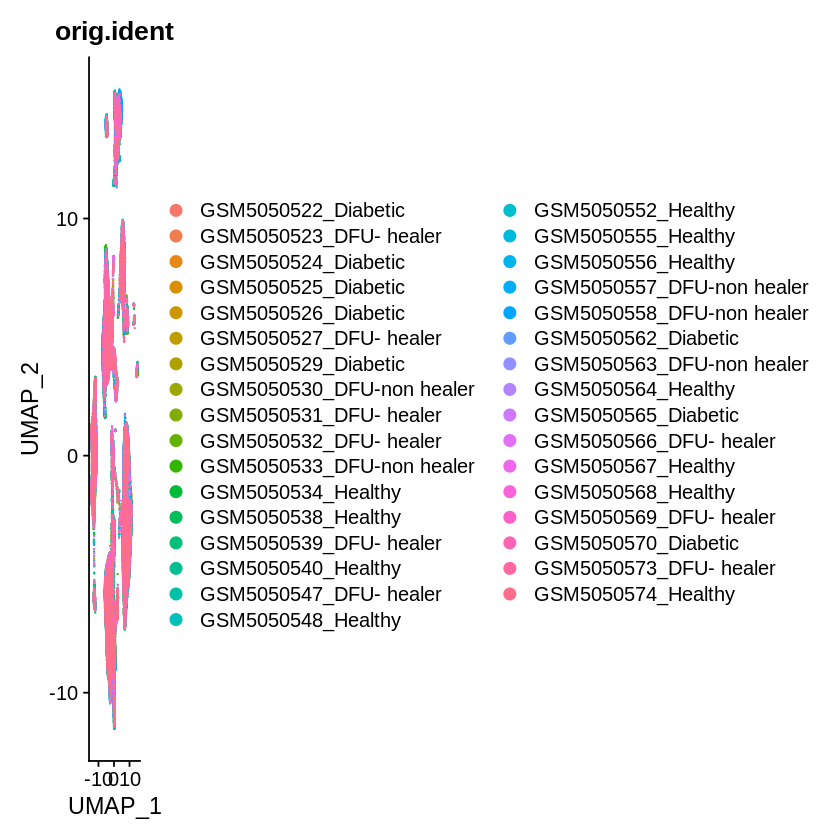

In [11]:
DimPlot(bm280k.integrated, group.by = "orig.ident")

In [16]:
# Create a major_group column in the metadata
bm280k.integrated$major_group <- NA

# Assign major group labels based on patterns in orig.ident
bm280k.integrated$major_group[grep("_Diabetic$", bm280k.integrated$orig.ident)] <- "Diabetic"
bm280k.integrated$major_group[grep("_DFU- healer$", bm280k.integrated$orig.ident)] <- "DFU-Healer"
bm280k.integrated$major_group[grep("_Healthy$", bm280k.integrated$orig.ident)] <- "Healthy"
bm280k.integrated$major_group[grep("_DFU-non healer$", bm280k.integrated$orig.ident)] <- "DFU-Non Healer"
bm280k.integrated$major_group[is.na(bm280k.integrated$major_group)] <- "Other"

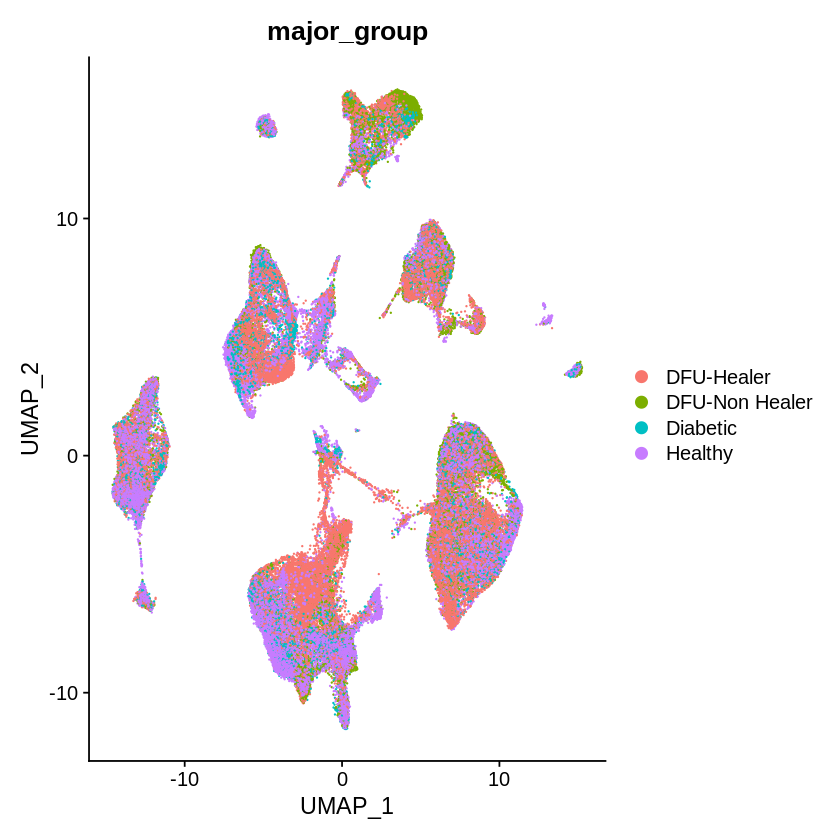

In [17]:
# Now, you can plot UMAP based on major groups
DimPlot(bm280k.integrated, group.by = "major_group")

In [24]:
# Set the size of the UMAP plots
options(repr.plot.width = 20, repr.plot.height = 8)  # Adjust width and height as needed

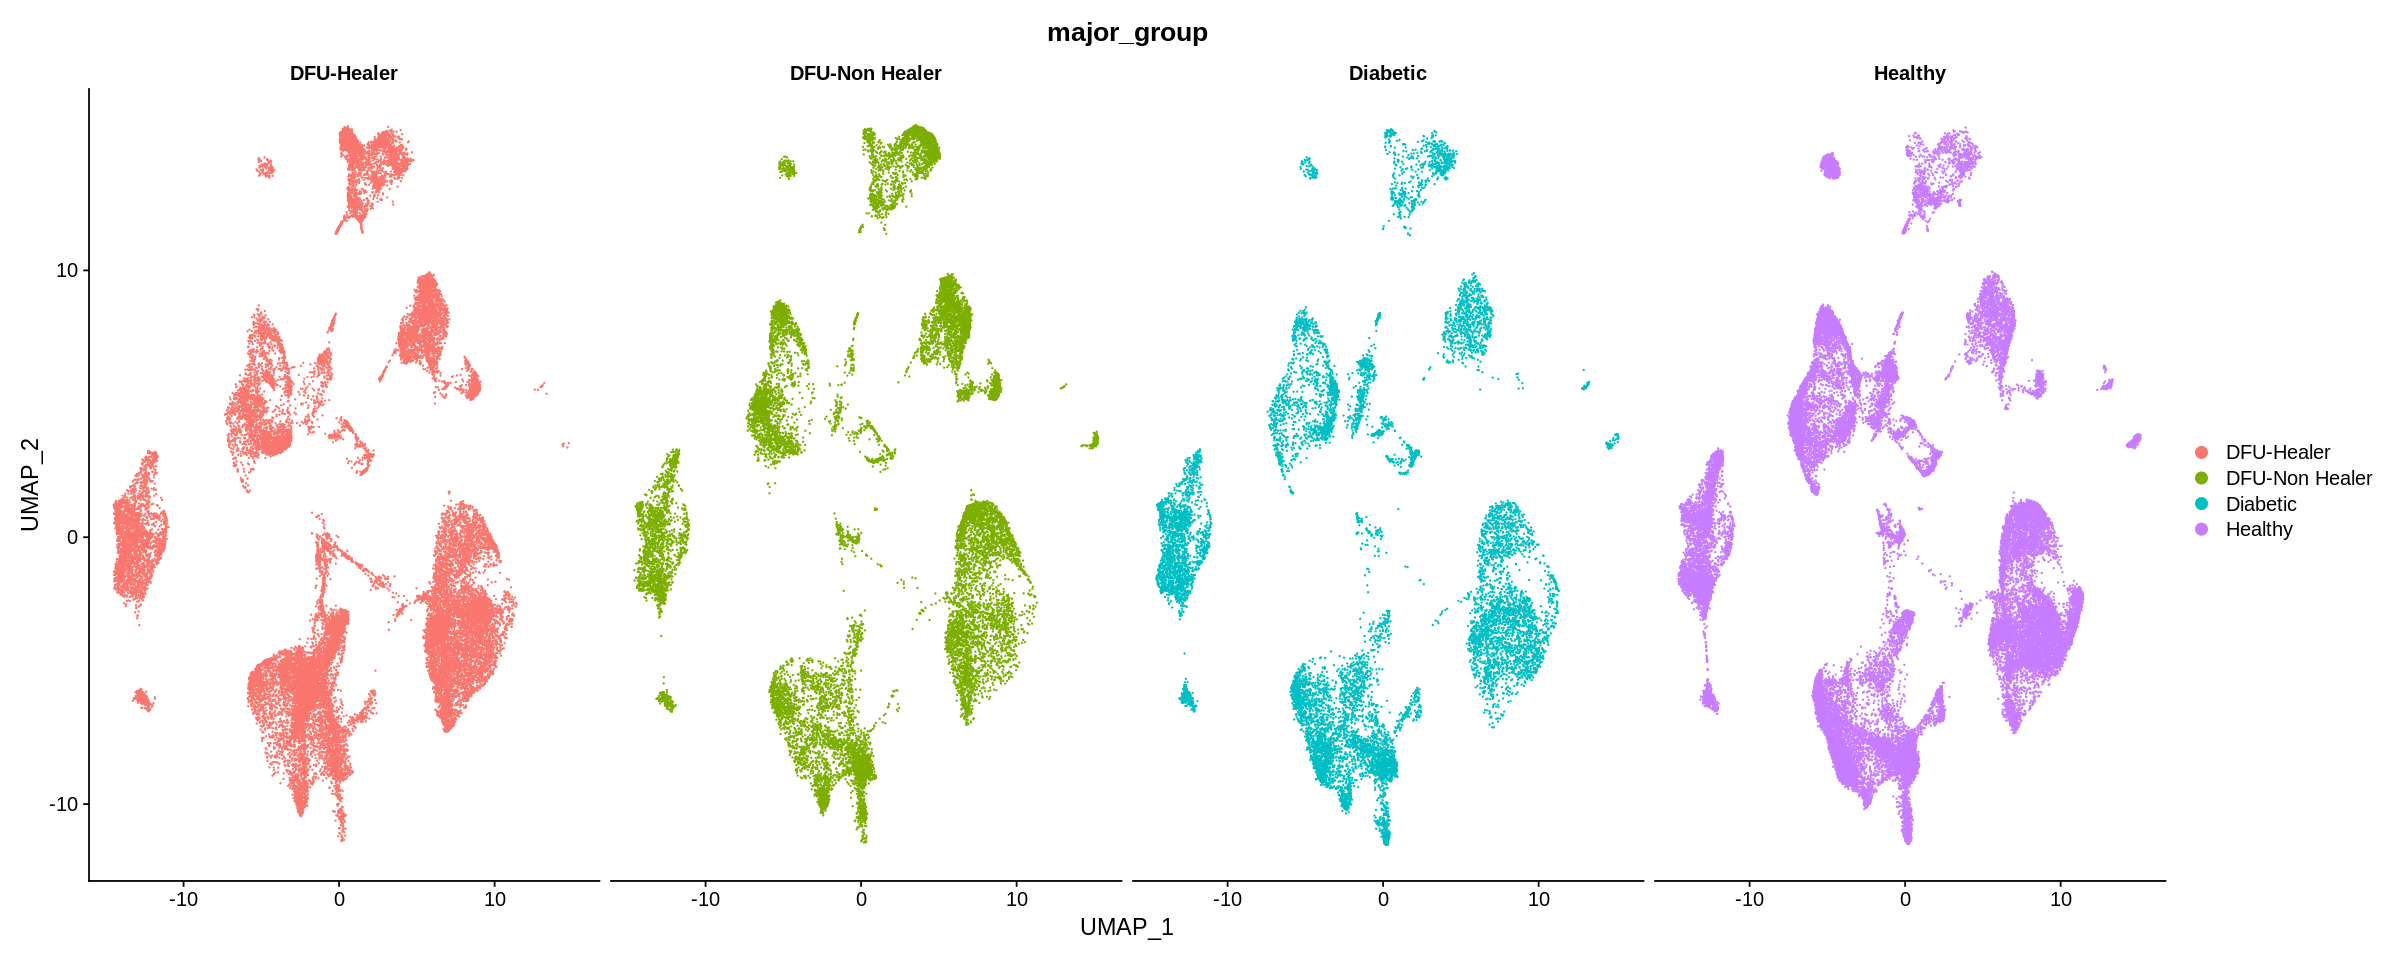

In [25]:
# Create separate UMAP plots for each major group
DimPlot(bm280k.integrated, group.by = "major_group", split.by = "major_group")


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 94325
Number of edges: 3840118

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9670
Number of communities: 18
Elapsed time: 28 seconds


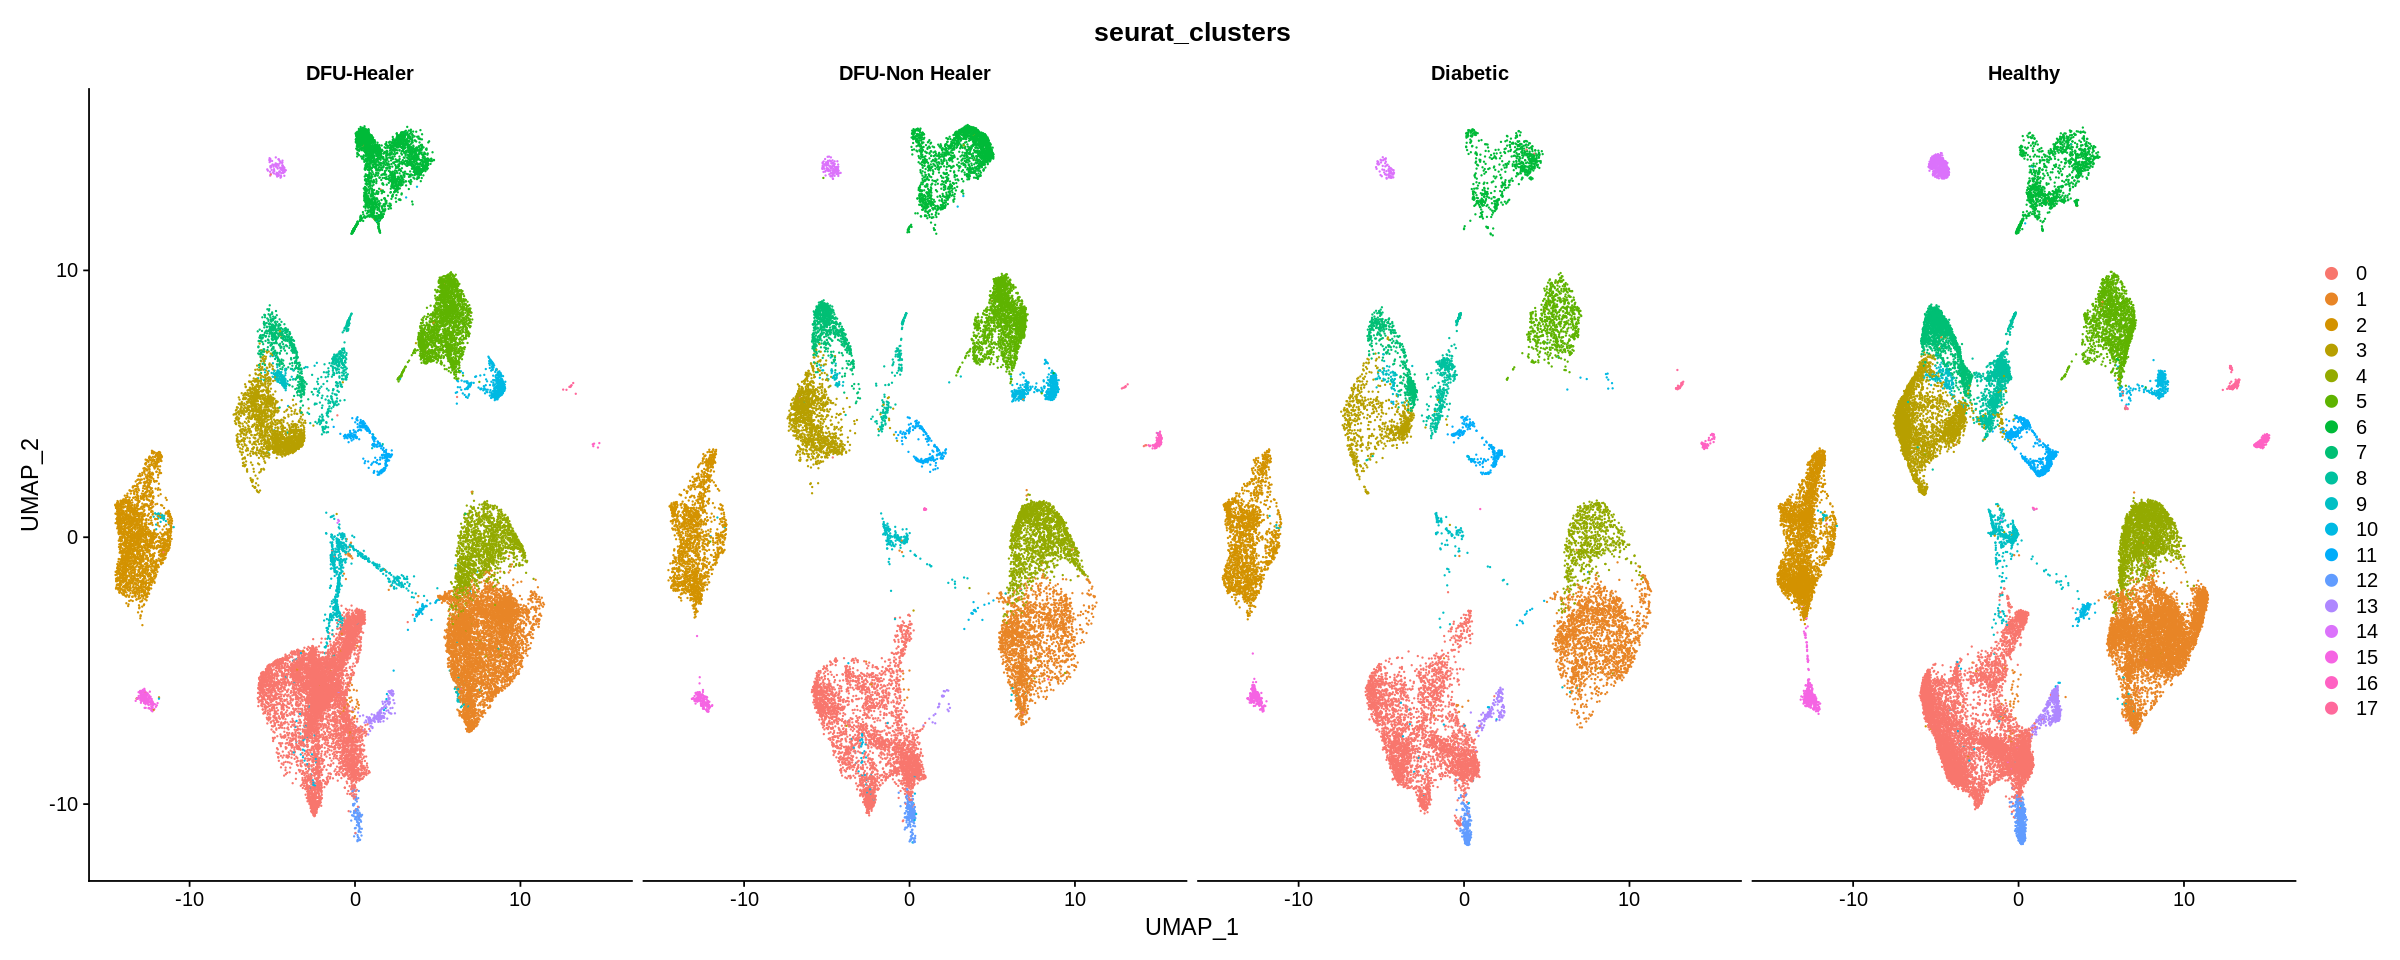

In [26]:
options(repr.plot.width = 20, repr.plot.height = 8)
bm280k.integrated <- FindNeighbors(bm280k.integrated, dims = 1:50)
bm280k.integrated <- FindClusters(bm280k.integrated, resolution = 0.2)  # can adjust the resolution parameter
DimPlot(bm280k.integrated, group.by = 'seurat_clusters', split.by = "major_group")

